# Tarea 2 - Ana Cristina Molina - cc. 1044508251

In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def harmonic_potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

def anharmonic_potential(x):
    """Quamtum anharmonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2 - x**3 + x**4

def rho_free(x, xp, beta):
    """ Free off-diagonal density matrix 
    Args:
        x (float): position of the particle
        xp (float): prima position of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.exp(-(x - xp) ** 2 / (2.0 * beta)) / np.sqrt(2.0 * np.pi * beta)

def rho_harmonic_trotter(grid, beta, potential):
    """ Harmonic density matrix in the Trotter approximation 
    Args:
        grid (float): grid of positions of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.array([[rho_free(x, xp, beta) * np.exp(-0.5 * beta * (potential(x) + potential(xp))) #)0.5 * (x ** 2 + xp ** 2))
                      for x in grid] for xp in grid])

def analytic_quantum_probability(x, beta):
    """Analytic quantum density matrix
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0)) 


In [156]:
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [157]:
def convolution(x_max, nx, beta, potential, print_steps=False):
    
    """Compute the convolution until reach beta value
    Args:
        x_max (float): maximum value of the position
        nx (int): number of points in the grid
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    dx = 2.0 * x_max / (nx - 1)
    x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]

    beta_temp = 2.0 ** (-5)                   # initial value of beta (power of 2)
    rho = rho_harmonic_trotter(x, beta_temp, potential)
    
    while beta_temp < beta:
        rho = np.dot(rho, rho)
        rho *= dx
        beta_temp *= 2.0
        if print_steps:
            print('beta: %s -> %s' % (beta_temp / 2.0, beta_temp))
    
    return x, dx, rho

In [158]:
def get_Z(rho):
    """Partition function
    Args:
        rho (float): density matrix
    Returns:
        float: partition function"""
    return  np.sum(rho.diagonal()) 

In [159]:
def read_file(filename):
    
    """Reads a file with two columns and returns two lists
    Args:
        filename (string): name of the file
    Returns:
        list: list of the first column
        list: list of the second column
    """

    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


(-2.0, 2.0)

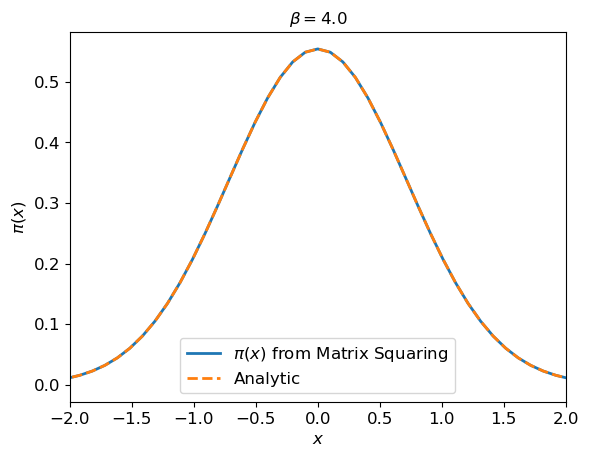

In [160]:
x_max = 5.0                              # maximum value of the position
nx = 100                                 # number of points in the grid
beta = 4.0                               # inverse temperature

x, dx, rho = convolution(x_max, nx, beta, harmonic_potential, True)
Z = get_Z(rho) * dx
pi_of_x = rho.diagonal()/Z #[rho[j, j] / Z for j in range(nx + 1)]

f = open('data_harm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='$\pi(x)$ from Matrix Squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='Analytic')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

## Changing dx

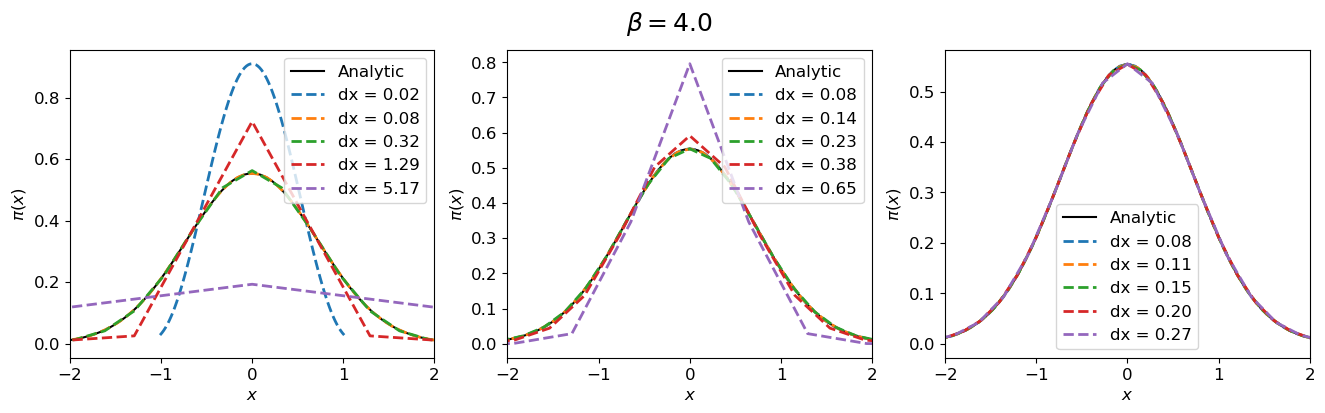

In [161]:
beta = 4.0                               # inverse temperature

xs_maxs = [2**np.linspace(0, 8, 5), 2**np.linspace(2, 5, 5), 2**np.linspace(2, 3.75, 5)]

fig, axs = plt.subplots(1, len(xs_maxs), figsize=(16, 4), sharex=True)
fig.suptitle(r'$\beta = {:.1f}$'.format(beta), fontsize=BIGGER_SIZE*1.5)

grid = np.linspace(-3, 3, 100)

for x_maxs, ax in zip(xs_maxs, axs):
    
    ax.plot(grid, [analytic_quantum_probability(d, beta) for d in grid], 'k-', label='Analytic')

    for x_max in x_maxs:
   
        x, dx, rho = convolution(x_max, nx, beta, harmonic_potential)
        Z = get_Z(rho) * dx
        pi_of_x = rho.diagonal()/Z 

        #ax.set_title(r'$dx = {:.2f}$'.format(dx))
        ax.plot(x, pi_of_x, '--', linewidth=2, label='dx = {:.2f}'.format(dx))

        ax.legend()
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\pi(x)$')
        ax.set_xlim(-2, 2)

## Changing $\beta$

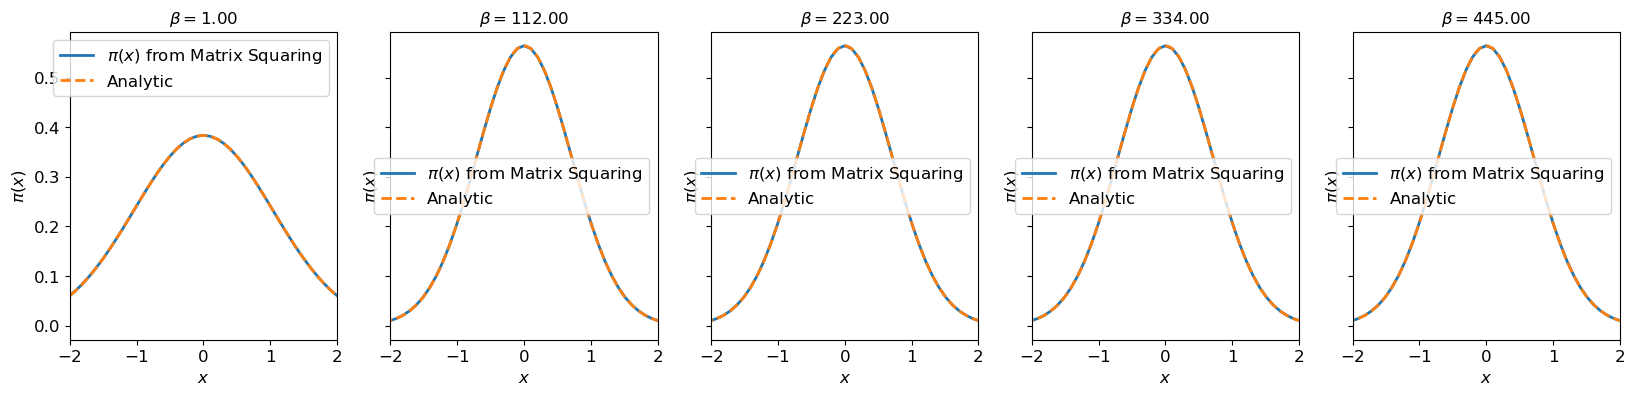

In [162]:
nx = 100                               # number of points in the grid
x_max = 5.0                             # inverse temperature

n_plots = 5
betas = np.linspace(1, 1e3, 10)

fig, axs = plt.subplots(1, n_plots, figsize=(20, 4), sharey=True, sharex=True)
axs = axs.ravel()

grid = np.linspace(-3, 3, 100)

Z_values = []
j = 0

for i,beta in enumerate(betas):
   
    x, dx, rho = convolution(x_max, nx, beta, harmonic_potential)
    Z = get_Z(rho) * dx
    Z_values.append(Z) 

    if j < n_plots:

        pi_of_x = rho.diagonal()/Z
        axs[j].set_title(r'$\beta = {:.2f}$'.format(beta))
        axs[j].plot(x, pi_of_x, linewidth=2, label='$\pi(x)$ from Matrix Squaring')
        axs[j].plot(grid, [analytic_quantum_probability(d, beta) for d in grid], '--', linewidth=2, label='Analytic')
        axs[j].legend()
        axs[j].set_xlabel(r'$x$')
        axs[j].set_ylabel(r'$\pi(x)$')
        axs[j].set_xlim(-2, 2)

        j += 1

In [163]:
Z_theoric = lambda beta: 1/2*np.sinh(beta/2)

In [164]:
Z_theoric(betas)

array([2.60547653e-001, 5.22914874e+023, 6.63398891e+047, 8.41624727e+071,
       1.06773193e+096, 1.35458411e+120, 1.71850074e+144, 2.18018561e+168,
       2.76590472e+192, 3.50898054e+216])

Text(0.5, 0, '$\\beta$')

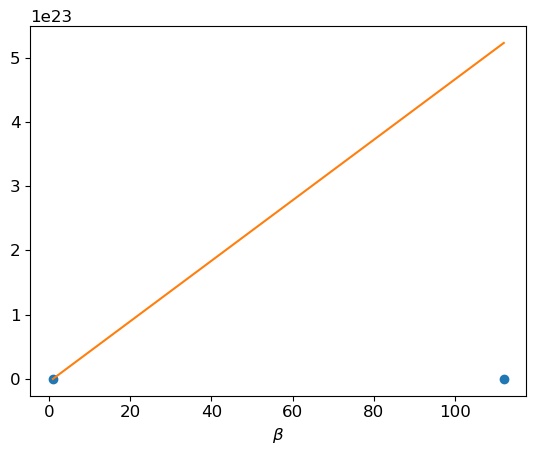

In [165]:
n = 2
plt.plot(betas[:n], Z_values[:n], 'o', label='Matrix Squaring')
plt.plot(betas[:n], Z_theoric(betas)[:n], '-', label='Analytic')
plt.xlabel(r'$\beta$')


Text(0, 0.5, '$\\log(Z)$')

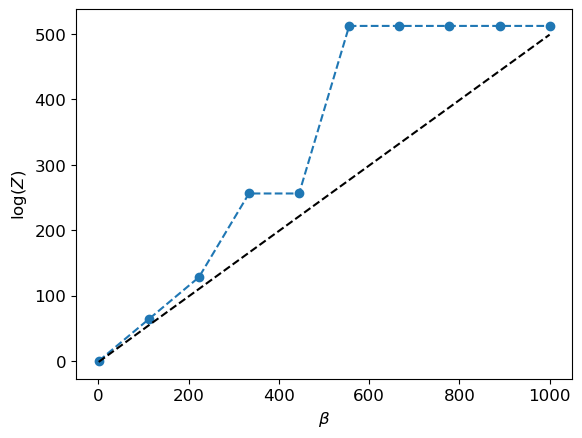

In [166]:
plt.plot(betas, -np.log(Z_values), 'o--', label='Matrix Squaring')
plt.plot(betas, np.log(Z_theoric(betas)), 'k--', label='Analytic')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\log(Z)$')

## Path integral

In [174]:
def path_integral(potential, beta, N, delta, n_steps):

    dtau = beta / N
    x = [0.0] * N

    x_0 = []
    x_k = []
    xs = []

    for step in range(n_steps):
        k = np.random.randint(0, N)
        knext, kprev = (k + 1) % N, (k - 1) % N

        x_new = x[k] + np.random.uniform(-delta, delta)

        old_weight  = (rho_free(x[knext], x[k], dtau) * rho_free(x[k], x[kprev], dtau) * np.exp(- dtau * potential(x[k])) ) #-0.5 * dtau * x[k] ** 2))
        new_weight  = (rho_free(x[knext], x_new, dtau) * rho_free(x_new, x[kprev], dtau) * np.exp(-  dtau * potential(x_new)) ) #-0.5 * dtau * x_new ** 2))

        if np.random.uniform(0.0, 1.0) < (new_weight / old_weight):
            x[k] = x_new

        xs.append(x)

        if step%10 == 0:
            x_0.append(x[0])
            x_k.append(x[4])

    return x_0, x_k, xs

In [177]:
beta = 4.0 
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(harmonic_potential, beta, N, delta, n_steps)

Text(0, 0.5, '$\\pi(x)$')

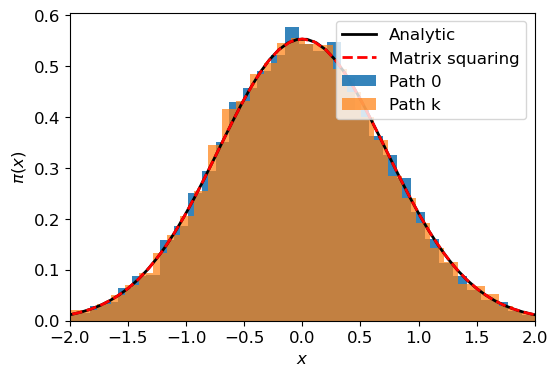

In [178]:
list_x, list_y = read_file('data_harm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(6, 4))
new_grid = np.linspace(-4, 4, 100)
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=50, alpha=0.9, label='Path 0')
plt.hist(x_k, density=True, bins=50, alpha=0.7, label='Path k')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')

# Anharmonic potential

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


(-2.0, 2.0)

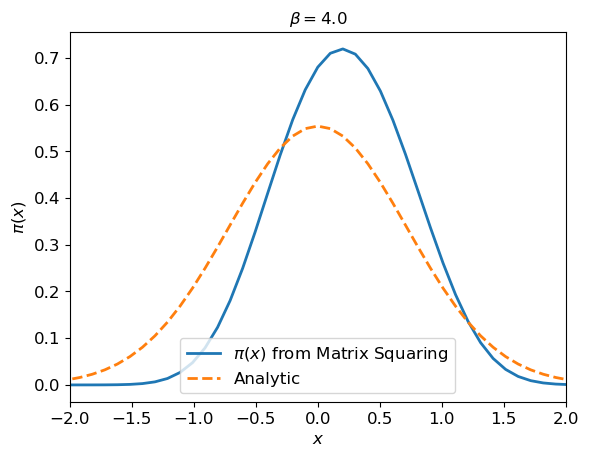

In [179]:
x_max = 5.0                              # maximum value of the position
nx = 100                                # number of points in the grid
beta = 4.0                               # inverse temperature

x, dx, rho = convolution(x_max, nx, beta, anharmonic_potential, True)
Z = get_Z(rho) * dx
pi_of_x = rho.diagonal()/Z #[rho[j, j] / Z for j in range(nx + 1)]

f = open('data_anharm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='$\pi(x)$ from Matrix Squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='Analytic')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

In [180]:
beta = 4.0 
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(anharmonic_potential, beta, N, delta, n_steps)

Text(0, 0.5, '$\\pi(x)$')

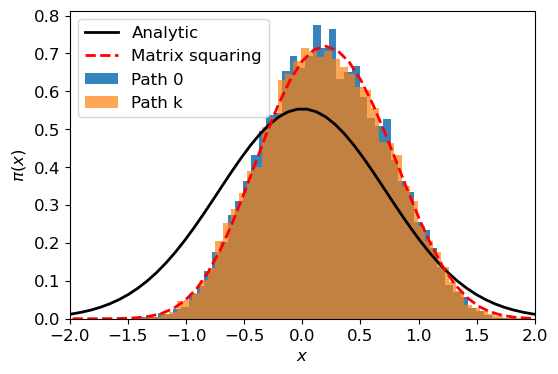

In [181]:
list_x, list_y = read_file('data_anharm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(6, 4))
new_grid = np.linspace(-4, 4, 100)
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=50, alpha=0.9, label='Path 0')
plt.hist(x_k, density=True, bins=50, alpha=0.7, label='Path k')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')